## CCNSS 2018 Module 4: High dimensional representations and neural dynamics
# Tutorial 4: Perceptron learning

[source](https://colab.research.google.com/drive/1V4PFwp0qYizOEjh1n68ZYh7CxJPe_7PQ)

*Please execute the cell bellow in order to initialize the notebook environment*

In [1]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import math                        # import basic math functions
import random                      # import basic random number generator functions

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

# Objectives

In this notebook we will implement the perceptron learning algorithm and introduce the concept of gradient descent for extensions to multiple layers. 

## Background

The perceptron belongs to the category of supervised learning algorithms, single-layer binary linear classifiers to be more specific. A typical task that can be accomplished by the perceptron is to to predict to which of two possible categories a certain data point belongs based on a set of input variables.

The perceptron can be thought of an artificial neuron that receives an input pattern from N other neurons and converting that input pattern to a single output value (e.g., a single binary value.) The most important elements of the perceptron are thus: 

1. The input pattern, which is represented by $\vec{x^{\mu}}\in\mathbb{R}^N$ (N is the number of connections and $\mu$ indexes the pattern) 
2. The connection weights from the N inputs, represented by a  a vector of real-valued weights $\vec{J}\in\mathbb{R}^N$, 
3. An output value that depends on the input pattern and weights as 

$$
g(\vec{x}) = \begin{cases}
                1 & \text{if }\vec{J} \cdot \vec{x}+b> 0\,,\\
                0 & \text{otherwise};
             \end{cases}
$$

where $g$ is a step function, $\vec{J} \cdot \vec{x}$ is  $\sum_{i=1}^N J_i x_i$ and b is a threshold. The learning algorithm refers to the updating of the weights $\vec{J}$ based on target ouput values $y^{\mu}$ and actual output values $y$.

We update the weights and threshold using the perceptron rule:

$$
\begin{align*}
J_i & = J_i + \alpha (y - \hat{y}) x_{i} \,,\  i=1,\ldots, N\,;\\
b & = b + \alpha (y - \hat{y})\,
\end{align*}
$$

where $$\hat{y} = g\left(\vec{J}\cdot\vec{x} + b\right).$$

and $\alpha\in\left(0,1\right]$ is the learning rate. 

In this notebook we will illustrate how to train a simple network and introduce the concept of linear separability. In exercises 1 and 2 we will train a simple perceptron to represent the AND function, which takes two binary input values (1 and 0) and ouputs a 1 only if both input values are 1. 



**EXERCISE 1**

Given a perceptron with two inputs (n =2), there are $2^2$ possible patterns: (0,0), (0,1), (1,0), (1,1). 
- For the AND function: list the possible patterns (inputs) and plot the inputs in the x-y plane, so that both outputs are distinguished (in red and blue, for example)
- plot the line that separates the inputs that map onto "1" from inputs that map onto "0"





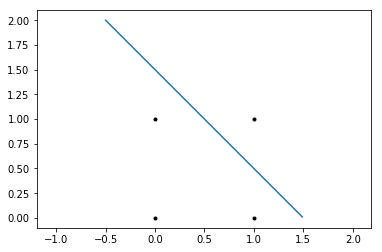

In [8]:
target = np.array([[0, 0], [0,1], [1,0], [1,1]])

plt.plot(target[:,0], target[:, 1], 'k.')

x = np.arange(-0.5, 1.5, 0.01)
y = -x + 1.5
plt.axis('equal')
plt.plot(x, y)



- find values for $\vec{J}$ and $b$ by inspection that solves the AND problem (there is more than one solution!) 


In [9]:
J = np.array([1,1])
b = -1.5


**EXERCISE 2**


We will now, instead of finding weights by inspection, assume that the weights are random and use the learning algorithm to learn the weights. 

- using the function np.random.random(), initialize the vector weights randomly on the interval [0,1]

In [11]:
#insert code here 
np.random.seed(1)
J_ini = np.random.random(2)
b_ini = 0
print(J_ini)

[0.417022   0.72032449]


### Expected output ###
```
[0.417022   0.72032449]
```

We will establish the training algorithm in a few steps:
 
 - Define the output target values and the learning rate. Use $\alpha = 0.1$
 - First, build a function "g_step()" with the properties described in the background above, i..e, a step function.
 - Define a function error () that calculates the difference between the target (desired output) and the real output (dependent on the weights), and then is multiplied by $\alpha$.
 


In [13]:
## insert code here

def g(J, x, b):
    '''
   arguments: these are the inputs to your activation function.
   the function retunrs either a 1 or a zero depending on the arguments
   '''
    if np.dot(J, x) + b > 0:
        return 1
    else:
        return 0

def get_error ():
    return error

  

In [0]:
J_ini

array([0.417022  , 0.72032449])


 - define a function(s) percep_train () that takes as inputs the initial weights $\vec{J}$ and initial threshold $b$, and calls the function error to output new weights via the update rule. Hint: You may define a list of input-output pairs for the function AND and use that as an input. There are many ways of doing this.
 

In [39]:
#insert code here
def g(J, x, b):
    '''
   arguments: these are the inputs to your activation function.
   the function retunrs either a 1 or a zero depending on the arguments
   '''

    return (np.dot(x, J) + b > 0)*1.0


def percep_train(weights_ini,b_ini,inputs, outputs):
    '''
  weights_ini: This is a vector of your (random) initial weights
  b_ini: This is your bias or threshold, it was initialized at 0
  inputs: This is a set of your input-output pairs that you will use for training.
  The function returns new weights and b based on the update rule (perceptron learning rule)'''

    steps = 200
    
    J = weights_ini
    b = b_ini
    Y = outputs
    alpha = 0.1
    for i in range(steps):

        J = J + alpha*np.dot((Y - g(J, inputs, b)), inputs)/inputs.shape[0]
        b = b + alpha*np.sum((Y - g(J, inputs, b)))/inputs.shape[0]
        
    return J, b
np.random.seed(1)
J_ini = np.random.random(2)
b_ini = 0
J, b = percep_train(J_ini,b_ini,target, np.array([0, 0, 0, 1]))
print(J, b)

[0.267022   0.42032449] -0.4250000000000001


- Train your perceptron for 20, 60, and 150 steps. Using your learned weights and bias b, plot the line that separates the points (the line that defines the AND function). Hint: Loop over your perceptron training algorithm N times. 

[0. 0. 0. 1.]


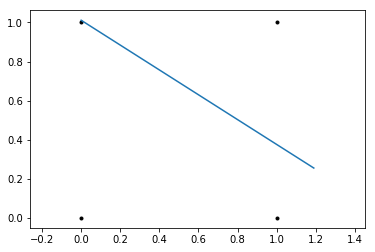

In [40]:
plt.axis('equal')

plt.plot(target[:,0], target[:,1], 'k.')
x1 = np.arange(0, 1.2, 0.01)
x2 = (-b - J[0]*x1)/J[1]
plt.plot(x1, x2)
print(g(J, target, b))

### Expected output ###


![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/4_perceptron/figures/Mod4T4E2.png)



- Do the same training for the function OR. There are many solutions, but to compare to expected output, initialize your random seed as before. 

[0.417022   0.72032449] 0.0
[0. 1. 1. 1.]


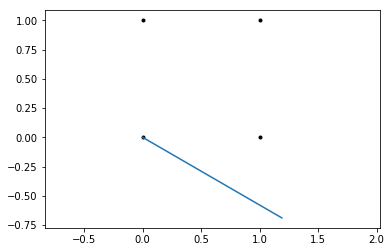

In [41]:
def g(J, x, b):
    '''
   arguments: these are the inputs to your activation function.
   the function retunrs either a 1 or a zero depending on the arguments
   '''

    return (np.dot(x, J) + b > 0)*1.0


def percep_train(weights_ini,b_ini,inputs, outputs):
    '''
  weights_ini: This is a vector of your (random) initial weights
  b_ini: This is your bias or threshold, it was initialized at 0
  inputs: This is a set of your input-output pairs that you will use for training.
  The function returns new weights and b based on the update rule (perceptron learning rule)'''

    steps = 200
    
    J = weights_ini
    b = b_ini
    Y = outputs
    alpha = 0.1
    for i in range(steps):

        J = J + alpha*np.dot((Y - g(J, inputs, b)), inputs)/inputs.shape[0]
        b = b + alpha*np.sum((Y - g(J, inputs, b)))/inputs.shape[0]
        
    return J, b
np.random.seed(1)
J_ini = np.random.random(2)
b_ini = 0
J, b = percep_train(J_ini,b_ini,target, np.array([0, 1, 1, 1]))
print(J, b)

plt.axis('equal')

plt.plot(target[:,0], target[:,1], 'k.')
x1 = np.arange(0, 1.2, 0.01)
x2 = (-b - J[0]*x1)/J[1]
plt.plot(x1, x2)
print(g(J, target, b))

### Expected output ###


![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/4_perceptron/figures/Mod4T4E2b.png)



**EXERCISE 3** (the XOR problem)

The XOR function is a binary function whose output is "1" only if exactly one of the inputs is 1, and the output is "0" otherwise.

- plot the possible input patterns for the XOR function (with a different color for different ouputs). Can you find a line that can separate the inputs? (try inspection and training)

- try training a network to achieve XOR. How would you solve the problem? (Try pen and paper. Hint: How many lines would you need to separate the input patterns? What does this imply for the number of layers required?)

### Exercise 4 ###

In this exercise we will perform linear regression using the perceptron. The data is composed of 8 points in two dimensional space. To perform linear regression, you have to change (or extend) your activation function g so that the output is linear, i.e., $g(x) = x$

- First, plot the data.

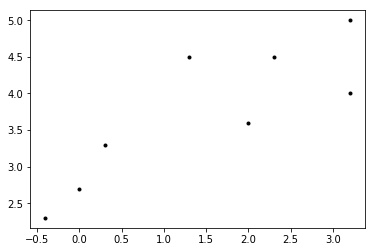

In [43]:
x_1 = np.array([0,2.7])
x_2 = np.array([2,3.6])
x_3 = np.array([3.2,5])
x_4 = np.array([2.3,4.5])
x_5 = np.array([3.2,4])
x_6 = np.array([0.3,3.3])
x_7 = np.array([-0.4, 2.3])
x_8 = np.array([1.3, 4.5])

#Insert code here
data = np.array([[0,2.7]    ,
[2,3.6]    ,
[3.2,5]    ,
[2.3,4.5]  ,
[3.2,4]    ,
[0.3,3.3]  ,
[-0.4, 2.3],
[1.3, 4.5]])

plt.plot(data[:,0],data[:,1], 'k.')

- Train your perceptron to find the weights and b for linear regression. Plot the line using your new weights and b. Optional: Check your results with the built in function np.linalg.lstsq() (least squares)

[0.55663243] 2.909252238416972
[[2.90925224 2.90925224]
 [2.90925224 3.46588467]
 [3.46588467 2.90925224]
 [3.46588467 3.46588467]]


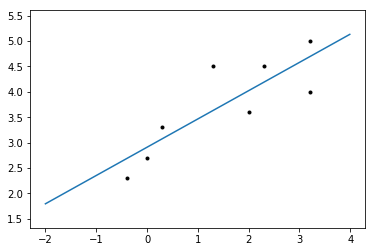

In [50]:
#insert code here
np.random.seed(5)
J_ini = np.random.random(1)
b_ini = 0



def g(J, x, b):
    '''
   arguments: these are the inputs to your activation function.
   the function retunrs either a 1 or a zero depending on the arguments
   '''

    return np.abs(x * J + b)


def percep_train(weights_ini,b_ini,inputs, outputs):
    '''
  weights_ini: This is a vector of your (random) initial weights
  b_ini: This is your bias or threshold, it was initialized at 0
  inputs: This is a set of your input-output pairs that you will use for training.
  The function returns new weights and b based on the update rule (perceptron learning rule)'''

    steps = 200
    
    J = weights_ini
    b = b_ini
    Y = outputs
    alpha = 0.1
    for i in range(steps):

        J = J + alpha*np.dot((Y - g(J, inputs, b)), inputs)/inputs.shape[0]
        b = b + alpha*np.sum((Y - g(J, inputs, b)))/inputs.shape[0]
        
    return J, b

np.random.seed(5)
J_ini = np.random.random(1)
b_ini = 0
J, b = percep_train(J_ini,b_ini,data[:,0], data[:,1])
print(J, b)

plt.axis('equal')

plt.plot(data[:,0], data[:,1], 'k.')
x1 = np.arange(-2, 4, 0.01)
x2 = J*x1 + b
plt.plot(x1, x2)
print(g(J, target, b))

### Expected output ###


![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/4_perceptron/figures/Mod4T4E4.png)



**EXERCISE 5** 

(pen and paper) In the previous exercises we used a simple update learning rule. More generally, and closer to current implementations of perceptrons (e.g., multilayer perceptrons, deep convolutional networks), we define a cost function and use gradient descent to obtain the update rule for a general (and differentiable) activation function $g$.

- Write the cost function $E(W)$ as the error for a single -layer perceptron with target $y_T$ Hint: Use the expression for $\hat{y}$ introduced in the background. 


- Use the cost function defined above, calculate $\frac{\partial E(W)}{\partial W_i}$ and  $\frac{\partial E(W)}{\partial b}$  in terms of the derivative of the activation function $g$. From this derivative, write a new update rule.

 
 - If $g$ is a sigmoid function described by $g(a) = \frac{1}{1+e^a}$, where a is the activation, calculate the update rule in terms of g. Hint: You can write the derivative of g in terms of g itself.  








Done? Ask me for further bonus questions!